In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aadhar_df = pd.read_csv('api_data_aadhar_enrolment_0_500000 - Copy.csv')
aadhar_df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [4]:
aadhar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            500000 non-null  object
 1   state           500000 non-null  object
 2   district        500000 non-null  object
 3   pincode         500000 non-null  int64 
 4   age_0_5         500000 non-null  int64 
 5   age_5_17        500000 non-null  int64 
 6   age_18_greater  500000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 26.7+ MB


In [5]:
aadhar_df.describe()

,pincode,age_0_5,age_5_17,age_18_greater
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,519204.051054,4.040812,2.315682,0.245558
std,206793.322085,24.417921,20.191196,4.438557
min,100000.000000,0.000000,0.000000,0.000000
25%,362229.000000,1.000000,0.000000,0.000000
50%,517131.000000,2.000000,0.000000,0.000000
75%,712139.000000,3.000000,1.000000,0.000000
max,855456.000000,2688.000000,1812.000000,855.000000


### Converting age-group columns into one column

In [6]:
age_cols = ["age_0_5", "age_5_17", "age_18_greater"]

age_df = aadhar_df.melt(
    value_vars=age_cols,
    var_name="Age_Group",
    value_name="Enrolment"
)


In [7]:
age_df["Age_Group"] = age_df["Age_Group"].map({
    "age_0_5": "Age 0–5",
    "age_5_17": "Age 5–17",
    "age_18_greater": "Age 18+"
})


In [8]:
age_df

,Age_Group,Enrolment
0,Age 0–5,11
1,Age 0–5,14
2,Age 0–5,29
3,Age 0–5,62
4,Age 0–5,14
...,...,...
1499995,Age 18+,0
1499996,Age 18+,0
1499997,Age 18+,0
1499998,Age 18+,0


### Total Aadhaar Enrolment by Age Group

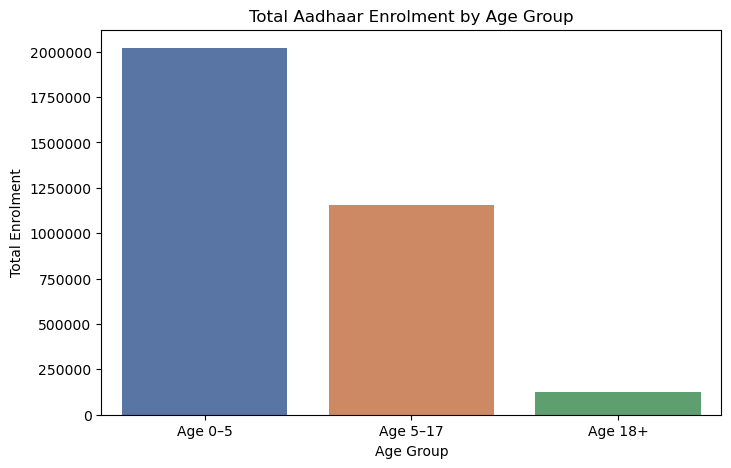

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=age_df,
    x="Age_Group",
    y="Enrolment",
    estimator=sum,
    errorbar=None,
    hue='Age_Group',
    palette='deep'
)

plt.title("Total Aadhaar Enrolment by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Enrolment")
plt.ticklabel_format(style='plain', axis='y')
plt.show()



<Axes: xlabel='state', ylabel='count'>

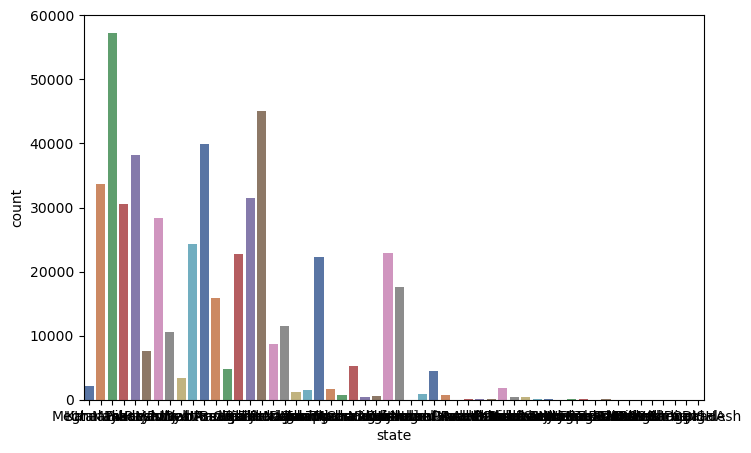

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=aadhar_df,
    x = 'state',
    hue='state',
    palette='deep'
)

In [11]:
state_enrol = aadhar_df.groupby("state")[["age_0_5","age_5_17","age_18_greater"]].sum()
state_enrol["total"] = state_enrol.sum(axis=1)
state_enrol = state_enrol.reset_index()


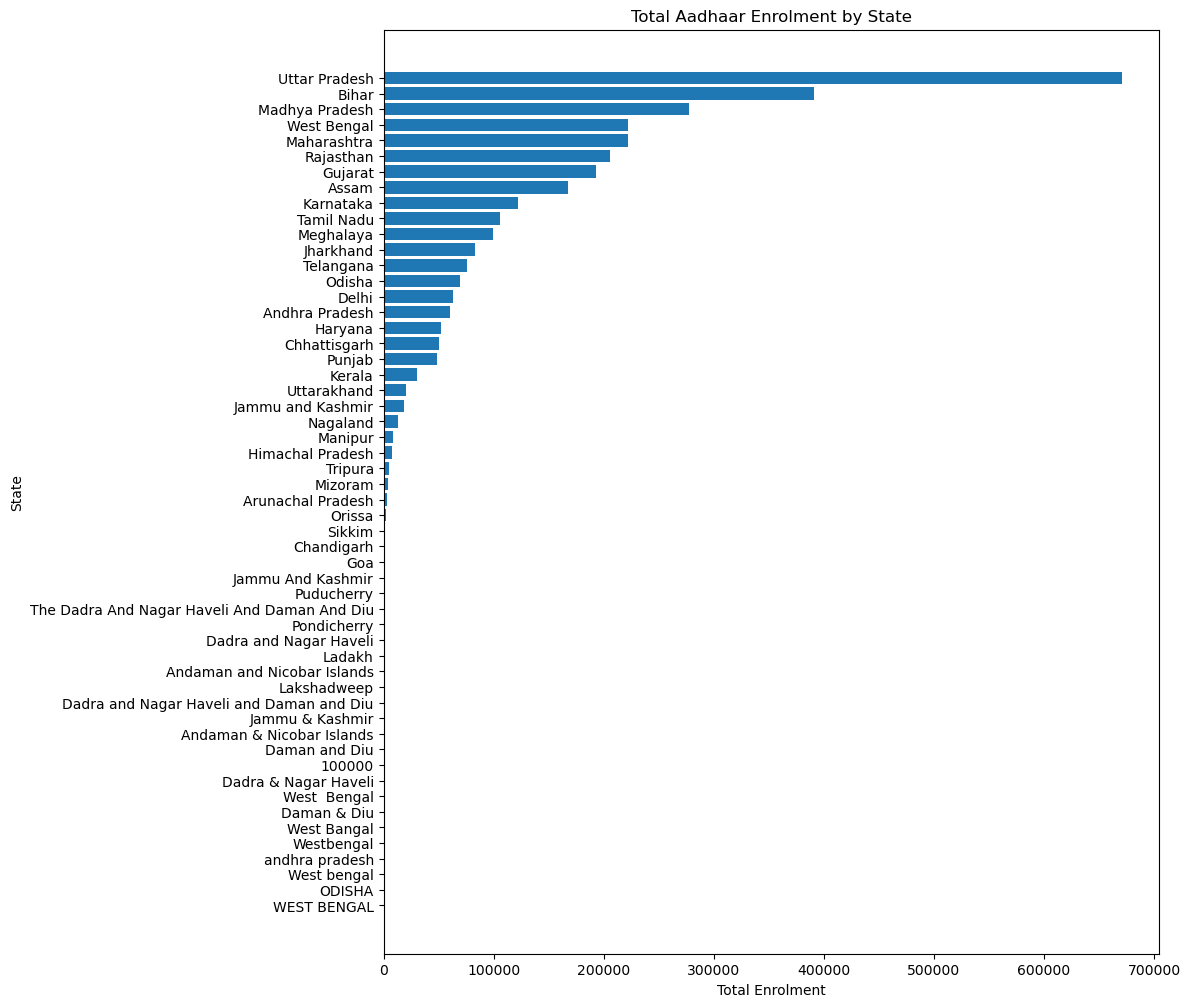

In [27]:
plt.figure(figsize=(10, 12))
state_enrol_sorted = state_enrol.sort_values("total", ascending=True)

plt.barh(state_enrol_sorted["state"], state_enrol_sorted["total"])
plt.title("Total Aadhaar Enrolment by State")
plt.xlabel("Total Enrolment")
plt.ylabel("State")
plt.savefig("state_wise_enrolment.png", dpi=300, bbox_inches="tight")
plt.show()



In [13]:
aadhar_df["total_enrolment"] = (
    aadhar_df["age_0_5"] +
    aadhar_df["age_5_17"] +
    aadhar_df["age_18_greater"]
)

In [14]:
aadhar_df["date"] = pd.to_datetime(
    aadhar_df["date"],
    format="%d-%m-%Y"
)

In [15]:
daily_enrol = (
    aadhar_df
    .groupby("date")["total_enrolment"]
    .sum()
)

### Daily Enrolment Trend (System Load)

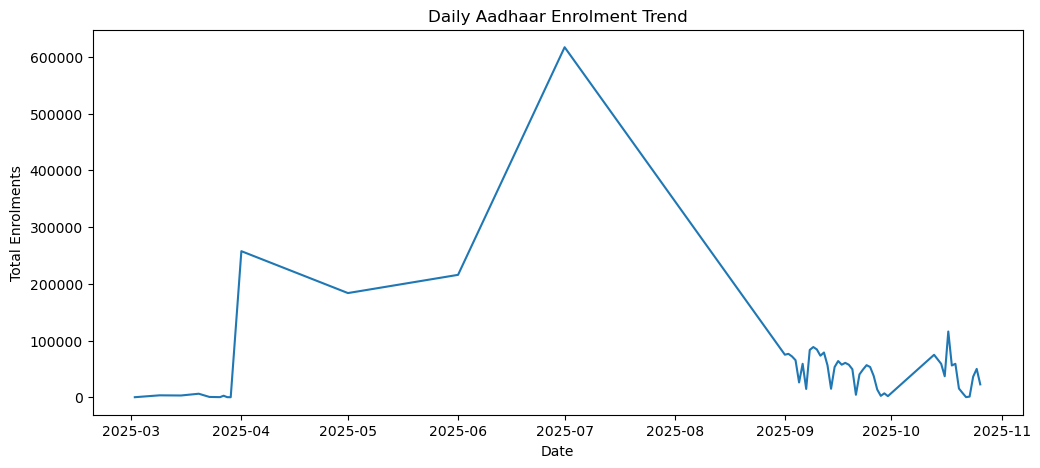

In [29]:
plt.figure(figsize=(12,5))
plt.plot(daily_enrol)
plt.title("Daily Aadhaar Enrolment Trend")
plt.xlabel("Date")
plt.ylabel("Total Enrolments")
plt.savefig("daily_enrolment_trend.png", dpi=300, bbox_inches="tight")

plt.show()

### Age-wise Trend Over Time

In [17]:
age_time_trend = (
    aadhar_df
    .groupby("date")[["age_0_5", "age_5_17", "age_18_greater"]]
    .sum()
)

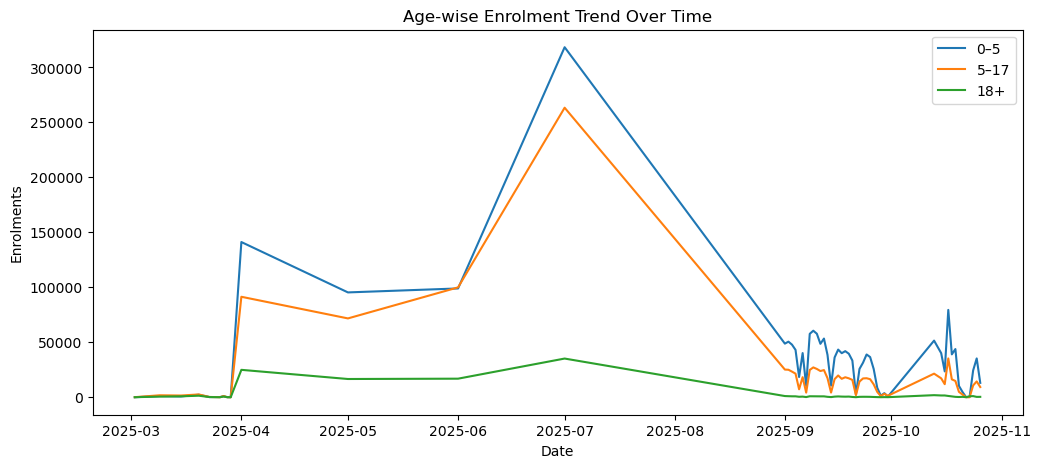

In [32]:
plt.figure(figsize=(12,5))
plt.plot(age_time_trend)
plt.title("Age-wise Enrolment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Enrolments")
plt.legend(["0–5", "5–17", "18+"])
plt.savefig("age_group_time_trend.png", dpi=300, bbox_inches="tight")

plt.show()

### District-Level Enrolment Concentration

In [19]:
district_enrol = (
    aadhar_df
    .groupby("district")["total_enrolment"]
    .sum()
    .sort_values(ascending=False)
)

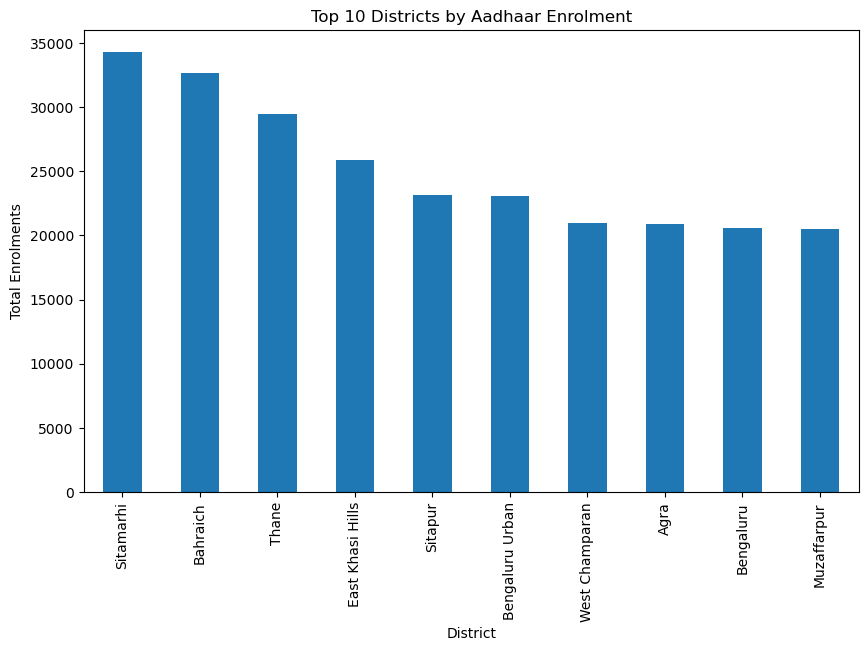

In [28]:
plt.figure(figsize=(10,6))
district_enrol.head(10).plot(kind="bar")
plt.title("Top 10 Districts by Aadhaar Enrolment")
plt.xlabel("District")
plt.ylabel("Total Enrolments")
plt.savefig("district_enrolment_top.png", dpi=300, bbox_inches="tight")
plt.show()

### Pincode Load Distribution (Inequality Insight)

In [21]:
pincode_enrol = (
    aadhar_df
    .groupby("pincode")["total_enrolment"]
    .sum()
)

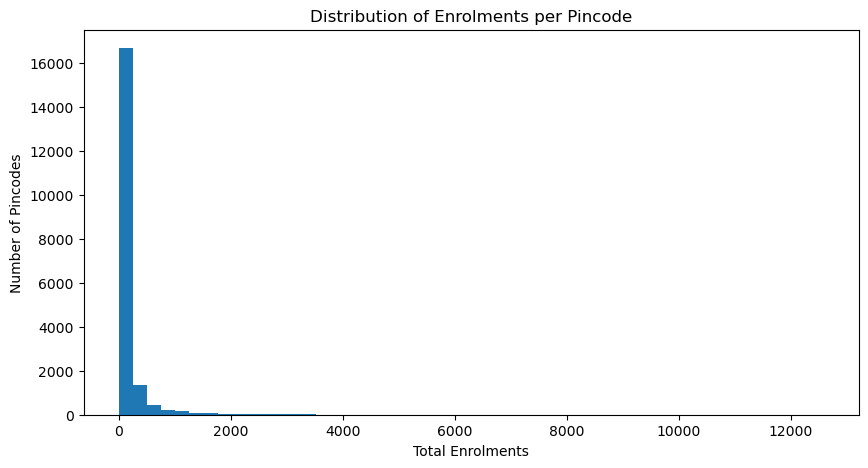

In [22]:
plt.figure(figsize=(10,5))
plt.hist(pincode_enrol, bins=50)
plt.title("Distribution of Enrolments per Pincode")
plt.xlabel("Total Enrolments")
plt.ylabel("Number of Pincodes")
plt.show()

### Child vs Adult Contribution

In [23]:
child_total = (
    aadhar_df["age_0_5"] +
    aadhar_df["age_5_17"]
).sum()

adult_total = aadhar_df["age_18_greater"].sum()

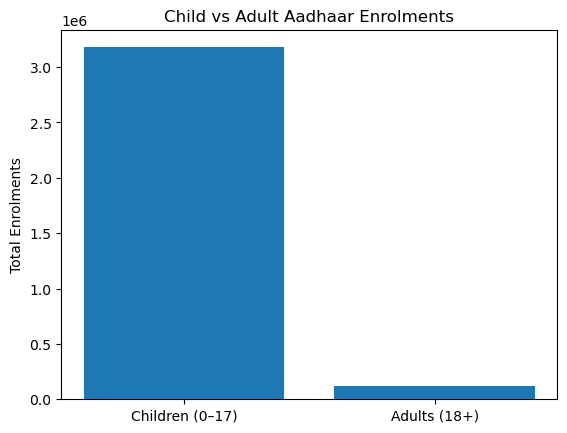

In [24]:
plt.figure()
plt.bar(["Children (0–17)", "Adults (18+)"], [child_total, adult_total])
plt.title("Child vs Adult Aadhaar Enrolments")
plt.ylabel("Total Enrolments")
plt.show()

### Monthly Enrolment Trend (Seasonality)

In [25]:
monthly_enrol = (
    aadhar_df
    .groupby(aadhar_df["date"].dt.to_period("M"))["total_enrolment"]
    .sum()
)

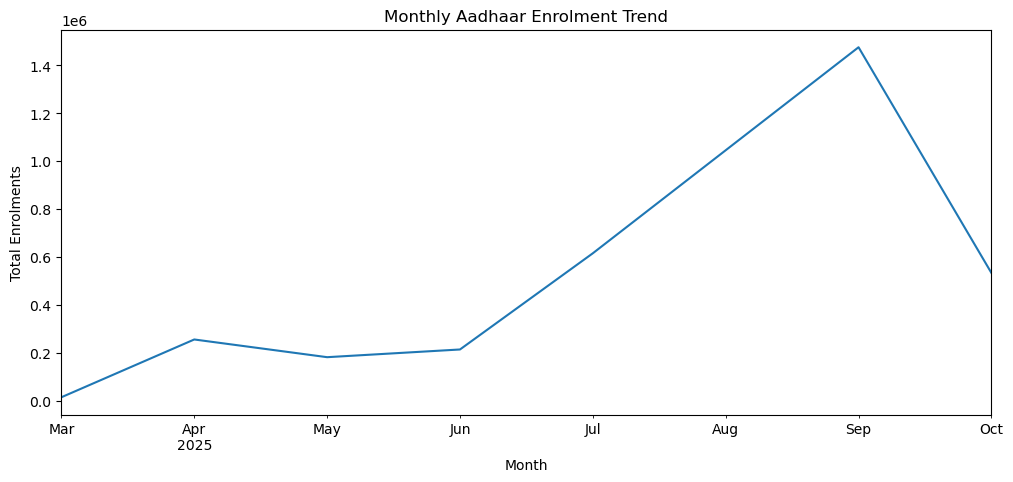

In [31]:
plt.figure(figsize=(12,5))
monthly_enrol.plot()
plt.title("Monthly Aadhaar Enrolment Trend")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.savefig("monthly_enrolment_trend.png", dpi=300, bbox_inches="tight")

plt.show()